In [1]:
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.metrics import Precision,Recall
from keras import Model
from tensorflow.keras.models import load_model
import logging

In [2]:
# Suppress specific TensorFlow warning
tf.get_logger().setLevel(logging.ERROR)

In [3]:
normal_df = pd.read_csv('ECG Heartbeat Categorization Dataset\ptbdb_normal.csv',header=None)
abnormal_df = pd.read_csv('ECG Heartbeat Categorization Dataset\ptbdb_abnormal.csv',header=None)

In [4]:
len(normal_df)

4046

In [5]:
len(abnormal_df)

10506

In [6]:
df = pd.concat([normal_df, abnormal_df])
df = df.reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14548,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14549,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14550,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


([<matplotlib.patches.Wedge at 0x1dc1a8f1650>,
 [Text(-0.7063789295915316, 0.8432252414563516, 'Abnormal'),
  Text(0.7063789295915318, -0.8432252414563512, 'Normal')],
 [Text(-0.3852975979590172, 0.4599410407943735, '72.2%'),
  Text(0.38529759795901736, -0.45994104079437337, '27.8%')])

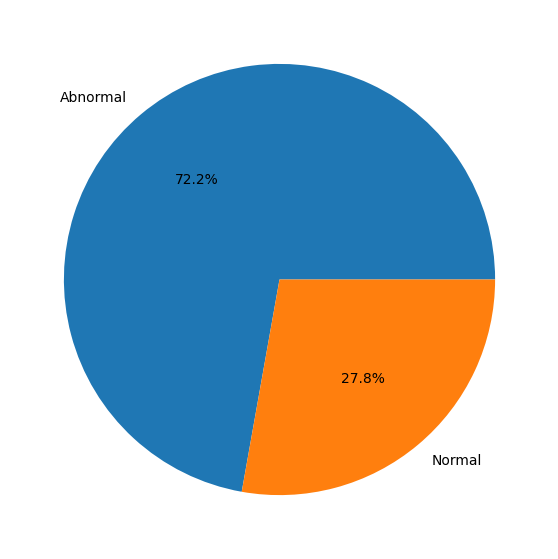

In [7]:
clases = df.iloc[:,187].value_counts()
plt.figure(figsize=(7,7))
plt.pie(clases, labels=['Abnormal','Normal'], autopct='%1.1f%%')

Text(0.5, 1.0, 'Abnormal')

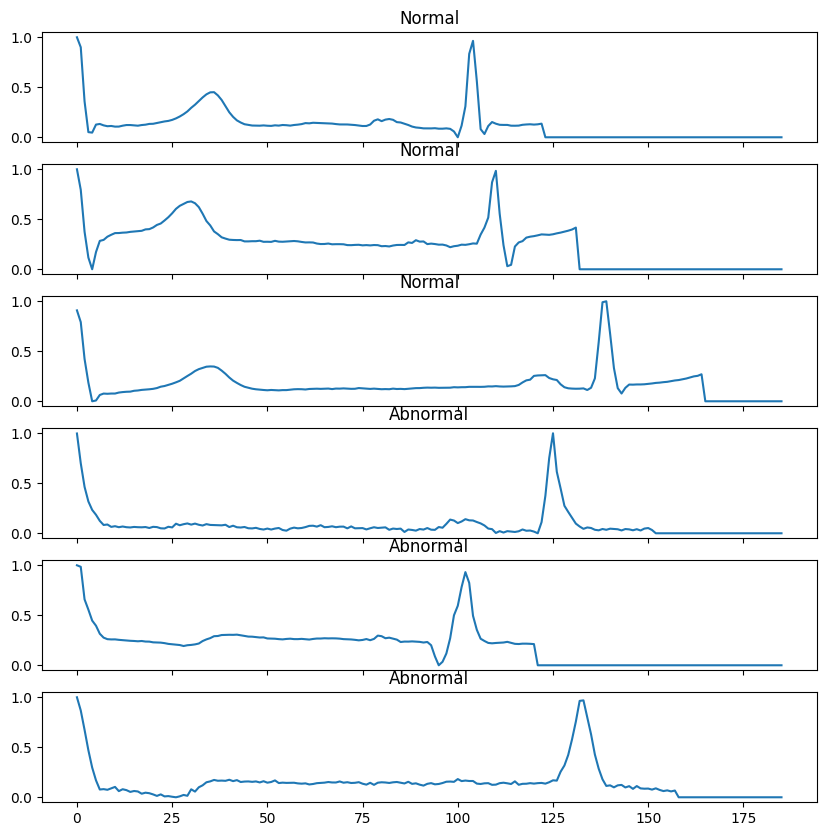

In [8]:
fig, ax = plt.subplots(6, sharex=True, sharey=True)
fig.set_size_inches(10,10)
ax[0].plot(df.iloc[0,:186])
ax[0].set_title("Normal")

ax[1].plot(df.iloc[1,:186])
ax[1].set_title("Normal")

ax[2].plot(df.iloc[2,:186])
ax[2].set_title("Normal")

ax[3].plot(df.iloc[-1,:186])
ax[3].set_title("Abnormal")

ax[4].plot(df.iloc[-2,:186])
ax[4].set_title("Abnormal")

ax[5].plot(df.iloc[-3,:186])
ax[5].set_title("Abnormal")

In [9]:
X = df.iloc[:,:186]
y = df.iloc[:,-1]
trax,tesx,tray,tesy = train_test_split(X,y,test_size=.3,random_state=42,stratify=y)

In [10]:
x_train = trax.values.reshape(len(trax), trax.shape[1],1)
x_test = tesx.values.reshape(len(tesx), tesx.shape[1],1)

**CNN**

In [11]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization,MultiHeadAttention,GlobalAveragePooling1D,LayerNormalization,Input
from keras.models import Sequential

In [13]:
cnn = Sequential([
    Conv1D(512,3,input_shape=(x_train.shape[1],1), activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Conv1D(128,3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Conv1D(64,2, activation='relu'),
    BatchNormalization(),
    Conv1D(32,2, activation='selu'),
    GlobalAveragePooling1D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [14]:
cnn.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy',Precision(),Recall()])

In [107]:
history_cnn = cnn.fit(x_train, tray, epochs=100, batch_size=32, validation_split=.2)

Epoch 1/100
255/255 [==============================] - 11s 44ms/step - loss: 0.0137 - accuracy: 0.9963 - precision: 0.9974 - recall: 0.9974 - val_loss: 0.2473 - val_accuracy: 0.9210 - val_precision: 0.9070 - val_recall: 0.9940
Epoch 2/100
255/255 [==============================] - 11s 44ms/step - loss: 0.0055 - accuracy: 0.9978 - precision: 0.9985 - recall: 0.9985 - val_loss: 0.0232 - val_accuracy: 0.9931 - val_precision: 0.9946 - val_recall: 0.9960
Epoch 3/100
255/255 [==============================] - 12s 45ms/step - loss: 0.0151 - accuracy: 0.9947 - precision: 0.9964 - recall: 0.9962 - val_loss: 0.9313 - val_accuracy: 0.8734 - val_precision: 0.8761 - val_recall: 0.9631
Epoch 4/100
255/255 [==============================] - 12s 46ms/step - loss: 0.0143 - accuracy: 0.9942 - precision: 0.9949 - recall: 0.9971 - val_loss: 0.1820 - val_accuracy: 0.9573 - val_precision: 0.9986 - val_recall: 0.9430
Epoch 5/100
255/255 [==============================] - 11s 44ms/step - loss: 0.0102 - accura

In [116]:
# Saving the CNN model
cnn.save('cnn_model.keras')

In [15]:
# Load the saved models
loaded_cnn = load_model('cnn_model.keras')

In [16]:
scores_cnn = loaded_cnn.evaluate(x_test,tesy)

137/137 [==============================] - 3s 14ms/step - loss: 0.0861 - accuracy: 0.9814 - precision: 0.9773 - recall: 0.9975


In [17]:
pred_cnn= loaded_cnn.predict(x_test)
yhat_cnn = pred_cnn>=.5
yhat_cnn = yhat_cnn.astype(int)

137/137 [==============================] - 2s 14ms/step


In [18]:
from sklearn.metrics import classification_report
print(classification_report(tesy.values,yhat_cnn))

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97      1214
         1.0       0.98      1.00      0.99      3152

    accuracy                           0.98      4366
   macro avg       0.99      0.97      0.98      4366
weighted avg       0.98      0.98      0.98      4366



**Transformer**

In [19]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = LayerNormalization()(x)
    return x + res

In [20]:
inputs = Input(shape=(x_train.shape[1],1))
x = inputs
x = transformer_encoder(x, 64, 4, 4, 0.1)
x = GlobalAveragePooling1D()(x)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="selu")(x)
x = Dense(32, activation="selu")(x)
x = Dense(16, activation="selu")(x)
outputs = Dense(1, activation="sigmoid")(x)
tf_model= Model(inputs, outputs)

In [ ]:
import tensorflow_addons as tfa

In [22]:
focal_loss = tfa.losses.SigmoidFocalCrossEntropy(alpha=0.33, gamma=2.5)

tf_model.compile(optimizer='adam', loss=focal_loss, metrics=["accuracy", Recall(), Precision()])

In [ ]:
history_tf = tf_model.fit(x_train, tray, epochs=10, batch_size=32, validation_split=.2, verbose=1)

In [205]:
# Saving the Transformer model
tf_model.save('transformer_model.keras')

In [24]:
# Load the saved models
loaded_transformer = load_model('transformer_model.keras')

In [26]:
scores_tf = loaded_transformer.evaluate(x_test,tesy)

137/137 [==============================] - 4s 24ms/step - loss: 0.0491 - accuracy: 0.6056 - recall_27: 0.5825 - precision_27: 0.8189


In [27]:
pred_transformer= loaded_transformer.predict(x_test)
yhat_transformer = pred_transformer>=.5
yhat_transformer = yhat_transformer.astype(int)
print(classification_report(tesy.values, yhat_transformer, zero_division=1))


137/137 [==============================] - 4s 24ms/step
              precision    recall  f1-score   support

         0.0       0.38      0.67      0.48      1214
         1.0       0.82      0.58      0.68      3152

    accuracy                           0.61      4366
   macro avg       0.60      0.62      0.58      4366
weighted avg       0.70      0.61      0.63      4366



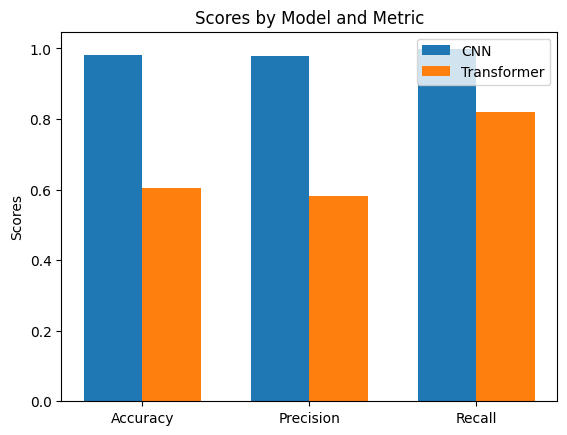

In [28]:
def plot_comparison(scores_cnn, scores_tf):
    labels = ['Accuracy', 'Precision', 'Recall']
    cnn_scores = [scores_cnn[1], scores_cnn[2], scores_cnn[3]]
    tf_scores = [scores_tf[1], scores_tf[2], scores_tf[3]] 

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, cnn_scores, width, label='CNN')
    rects2 = ax.bar(x + width/2, tf_scores, width, label='Transformer')

    ax.set_ylabel('Scores')
    ax.set_title('Scores by Model and Metric')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

plot_comparison(scores_cnn, scores_tf)


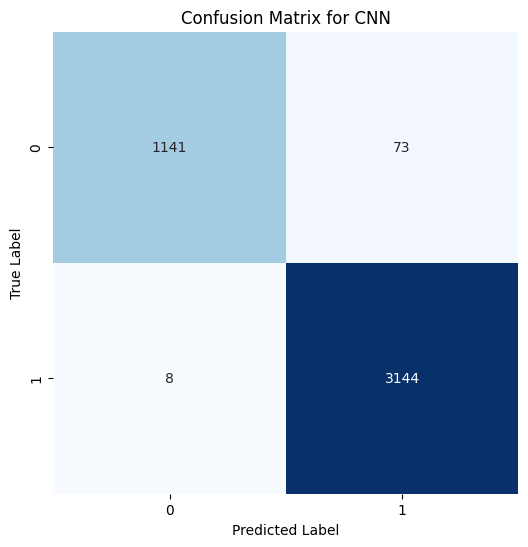

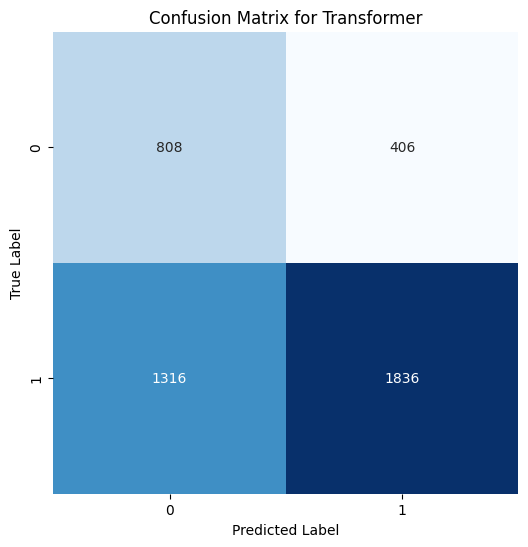

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Compute confusion matrix for CNN
cm_cnn = confusion_matrix(tesy, yhat_cnn)
plot_confusion_matrix(cm_cnn, title='Confusion Matrix for CNN')

# Compute confusion matrix for Transformer
cm_transformer = confusion_matrix(tesy, yhat_transformer)
plot_confusion_matrix(cm_transformer, title='Confusion Matrix for Transformer')
